# Roman Galactic Plane Survey Strategies

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
exptime = 47 # seconds
FoV = 0.281 # square degrees
Rubin_FoV = 9.6 # sq. deg
readout = 10 # seconds, guess
slewtime = 150 # seconds, based on data from https://roman.gsfc.nasa.gov/science/field_slew_and_roll.html
filter_change = 30 # seconds
survey_time = 700 * 3600 # seconds, total available survey time
mission_lifetime = 5 # years, nominal

In [8]:
# Time required to image a single pointing in two colors
visit_time = slewtime + 2.0*(filter_change + exptime + readout)
print('Time required for a single visit = ' + str(visit_time)+'s')

Time required for a single visit = 324.0s


In [21]:
max_pointings = int(survey_time / visit_time)
print('Maximum number of pointings possible in two colors = ' + str(max_pointings))
max_survey_area = max_pointings * FoV
print('Maximum total survey footprint in two color, single-visit strategy = ' + str(max_survey_area)+'sq. deg')
print('For comparison, this represents ~' + str(int(max_survey_area / Rubin_FoV)) + ' Rubin pointings')
rubin_galplane_area = 1530.0

Maximum number of pointings possible in two colors = 7777
Maximum total survey footprint in two color, single-visit strategy = 2185.337sq. deg
For comparison, this represents ~227 Rubin pointings


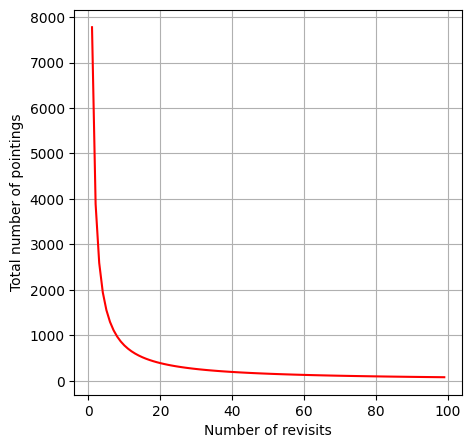

In [16]:
n_revisits = np.arange(1, 100, 1)
n_pointings = survey_time / (visit_time * n_revisits)
survey_area = n_pointings * FoV

fig = plt.figure(1,(5,5))
plt.plot(n_revisits, n_pointings, 'r-')
plt.xlabel('Number of revisits')
plt.ylabel('Total number of pointings')
plt.grid()
plt.show()

Nominally, 100 visits distributed across 4.5yr mission lifetime gives a cadence of ~16days, so pretty low cadence but deep.  

Although WFIRST's nominal mission duration is ~5yrs, it likely won't be able to observe the Galactic Plane continuously, any more than it could for the Bulge.  This is set by the periods when WFIRST can point at the Bulge and still orient its single solar-panel towards the Sun, although this is much less constrained for the Galactic Plane as a whole.  However, the period of regard for a single pointing is likely to be restricted.  As a result, these revisits per field will not be uniformly distributed across ~4.5yrs, boosting the cadence within limited windows for a selection of fields. 
